In [397]:
import pandas as pd
import numpy as np
import os
#os.chdir('Rider')

In [398]:
rider = pd.read_csv('trips_data.csv')

In [401]:
#Convert fare to one currency

rider['Fare INR'] = rider.apply(lambda x: x['Fare Amount']*70 if x['Fare Currency']=='USD' else x['Fare Amount'], axis = 1)
rider['Fare USD'] = rider.apply(lambda x: x['Fare Amount']/70 if x['Fare Currency']=='INR' else x['Fare Amount'], axis = 1)

In [402]:
rider.head()

,City,Product Type,Trip or Order Status,Request Time,Begin Trip Time,Begin Trip Lat,Begin Trip Lng,Begin Trip Address,Dropoff Time,Dropoff Lat,Dropoff Lng,Dropoff Address,Distance (miles),Fare Amount,Fare Currency,Fare INR,Fare USD
0,San Francisco,Pool: MATCHED,COMPLETED,2018-11-01 19:49:29 +0000 UTC,2018-11-01 19:51:52 +0000 UTC,37.615700,-122.386030,"Garage Level 5, Terminal 1, Section B - Pickup...",2018-11-01 20:28:26 +0000 UTC,37.795140,-122.404830,"750 Kearny St, San Francisco, CA 94108, US",15.25,17.74,USD,1241.8,17.74
1,Chicago,UberX,COMPLETED,2018-10-25 23:46:11 +0000 UTC,2018-10-25 23:50:17 +0000 UTC,41.891812,-87.628418,"540 N State St, Chicago, IL 60654, US",2018-10-26 00:30:21 +0000 UTC,41.979488,-87.905967,"10000 W O'Hare Ave, Chicago, IL 60666, USA",17.73,34.52,USD,2416.4,34.52
2,Chicago,UberX,COMPLETED,2018-10-24 17:19:50 +0000 UTC,2018-10-24 17:20:31 +0000 UTC,41.976180,-87.903570,"Terminal 3, Upper Level, Left of Door 3A, O'Ha...",2018-10-24 17:53:37 +0000 UTC,42.044390,-87.681930,"1501 Sherman Ave, Evanston, IL 60201, US",16.14,36.00,USD,2520.0,36.00
3,San Francisco,UberX,COMPLETED,2018-09-09 23:44:43 +0000 UTC,2018-09-09 23:45:40 +0000 UTC,37.418560,-121.898040,"298 Great Mall Dr, Milpitas, CA 95035, USA",2018-09-10 00:05:12 +0000 UTC,37.397790,-121.951440,"4289 Rivermark Pkwy, Santa Clara, CA 95054, US",6.00,15.57,USD,1089.9,15.57
4,San Francisco,Express Pool: MATCHED,COMPLETED,2018-09-09 01:28:26 +0000 UTC,2018-09-09 01:36:50 +0000 UTC,37.395490,-121.947470,"3985 Rivermark Pkwy, Santa Clara, CA 95054, USA",2018-09-09 01:50:17 +0000 UTC,37.334650,-121.888450,"6-22 E San Fernando St, San Jose, CA 95113, USA",6.33,7.94,USD,555.8,7.94


In [403]:
#change time to local time zone
from dateutil import tz
import datetime

rider['Begin Trip Time'] = rider['Begin Trip Time'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S %z %Z'))

rider['Request Time'] = rider['Request Time'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S %z %Z'))

rider['Dropoff Time'] = rider['Dropoff Time'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S %z %Z'))


from_zone = tz.gettz('UTC')
to_zone_Atl = tz.gettz('America/New_York')
to_zone_Sfo = tz.gettz('America/Los_Angeles')
to_zone_Chi = tz.gettz('America/Chicago')
to_zone_Ind = tz.gettz('Asia/Kolkata')

# utc = utc.replace(tzinfo=from_zone)

# # Convert time zone
# central = utc.astimezone(to_zone)

rider['Begin Trip Time - converted'] = rider.apply(lambda x: x['Begin Trip Time'].replace(tzinfo = from_zone).astimezone(to_zone_Atl) if x['City']=='Atlanta' or x['City']=='Baltimore-Maryland' else \
                                                            (x['Begin Trip Time'].replace(tzinfo = from_zone).astimezone(to_zone_Sfo) if x['City']=='San Francisco' else \
                                                            (x['Begin Trip Time'].replace(tzinfo = from_zone).astimezone(to_zone_Chi) if x['City']=='Chicago' else \
                                                             x['Begin Trip Time'].replace(tzinfo = from_zone).astimezone(to_zone_Ind))), axis = 1)

rider['Request Time - converted'] = rider.apply(lambda x: x['Request Time'].replace(tzinfo = from_zone).astimezone(to_zone_Atl) if x['City']=='Atlanta' or x['City']=='Baltimore-Maryland' else \
                                                            (x['Request Time'].replace(tzinfo = from_zone).astimezone(to_zone_Sfo) if x['City']=='San Francisco' else \
                                                            (x['Request Time'].replace(tzinfo = from_zone).astimezone(to_zone_Chi) if x['City']=='Chicago' else \
                                                             x['Request Time'].replace(tzinfo = from_zone).astimezone(to_zone_Ind))), axis = 1)

rider['Dropoff Time - converted'] = rider.apply(lambda x: x['Dropoff Time'].replace(tzinfo = from_zone).astimezone(to_zone_Atl) if x['City']=='Atlanta' or x['City']=='Baltimore-Maryland' else \
                                                            (x['Dropoff Time'].replace(tzinfo = from_zone).astimezone(to_zone_Sfo) if x['City']=='San Francisco' else \
                                                            (x['Dropoff Time'].replace(tzinfo = from_zone).astimezone(to_zone_Chi) if x['City']=='Chicago' else \
                                                             x['Dropoff Time'].replace(tzinfo = from_zone).astimezone(to_zone_Ind))), axis = 1)

In [404]:
rider.head()

,City,Product Type,Trip or Order Status,Request Time,Begin Trip Time,Begin Trip Lat,Begin Trip Lng,Begin Trip Address,Dropoff Time,Dropoff Lat,Dropoff Lng,Dropoff Address,Distance (miles),Fare Amount,Fare Currency,Fare INR,Fare USD,Begin Trip Time - converted,Request Time - converted,Dropoff Time - converted
0,San Francisco,Pool: MATCHED,COMPLETED,2018-11-01 19:49:29+00:00,2018-11-01 19:51:52+00:00,37.615700,-122.386030,"Garage Level 5, Terminal 1, Section B - Pickup...",2018-11-01 20:28:26+00:00,37.795140,-122.404830,"750 Kearny St, San Francisco, CA 94108, US",15.25,17.74,USD,1241.8,17.74,2018-11-01 12:51:52-07:00,2018-11-01 12:49:29-07:00,2018-11-01 13:28:26-07:00
1,Chicago,UberX,COMPLETED,2018-10-25 23:46:11+00:00,2018-10-25 23:50:17+00:00,41.891812,-87.628418,"540 N State St, Chicago, IL 60654, US",2018-10-26 00:30:21+00:00,41.979488,-87.905967,"10000 W O'Hare Ave, Chicago, IL 60666, USA",17.73,34.52,USD,2416.4,34.52,2018-10-25 18:50:17-05:00,2018-10-25 18:46:11-05:00,2018-10-25 19:30:21-05:00
2,Chicago,UberX,COMPLETED,2018-10-24 17:19:50+00:00,2018-10-24 17:20:31+00:00,41.976180,-87.903570,"Terminal 3, Upper Level, Left of Door 3A, O'Ha...",2018-10-24 17:53:37+00:00,42.044390,-87.681930,"1501 Sherman Ave, Evanston, IL 60201, US",16.14,36.00,USD,2520.0,36.00,2018-10-24 12:20:31-05:00,2018-10-24 12:19:50-05:00,2018-10-24 12:53:37-05:00
3,San Francisco,UberX,COMPLETED,2018-09-09 23:44:43+00:00,2018-09-09 23:45:40+00:00,37.418560,-121.898040,"298 Great Mall Dr, Milpitas, CA 95035, USA",2018-09-10 00:05:12+00:00,37.397790,-121.951440,"4289 Rivermark Pkwy, Santa Clara, CA 95054, US",6.00,15.57,USD,1089.9,15.57,2018-09-09 16:45:40-07:00,2018-09-09 16:44:43-07:00,2018-09-09 17:05:12-07:00
4,San Francisco,Express Pool: MATCHED,COMPLETED,2018-09-09 01:28:26+00:00,2018-09-09 01:36:50+00:00,37.395490,-121.947470,"3985 Rivermark Pkwy, Santa Clara, CA 95054, USA",2018-09-09 01:50:17+00:00,37.334650,-121.888450,"6-22 E San Fernando St, San Jose, CA 95113, USA",6.33,7.94,USD,555.8,7.94,2018-09-08 18:36:50-07:00,2018-09-08 18:28:26-07:00,2018-09-08 18:50:17-07:00


In [405]:
#Time related features
rider['Wait Time'] = rider.apply(lambda x: (x['Begin Trip Time'] - x['Request Time']).seconds/60 if x['Trip or Order Status']=='COMPLETED' else 0, axis = 1)

rider['Travel Time'] = rider.apply(lambda x: (x['Dropoff Time'] - x['Begin Trip Time']).seconds/60 if x['Trip or Order Status']=='COMPLETED' else 0, axis = 1)

rider['Total Interaction Time'] = rider.apply(lambda x: (x['Dropoff Time'] - x['Request Time']).seconds/60 if x['Trip or Order Status']=='COMPLETED' else 0, axis = 1)



In [406]:
#Additional time features
import calendar

rider['Hour of Request'] = rider.apply(lambda x: x['Request Time - converted'].hour, axis = 1)
rider['Month of Request'] = rider.apply(lambda x: x['Request Time - converted'].month, axis = 1)
rider['Day of Request'] = rider.apply(lambda x: x['Request Time - converted'].weekday(), axis = 1)
rider['Week of Request'] = rider.apply(lambda x: x['Request Time - converted'].week, axis = 1)

In [407]:
rider['value'] = 1
rider['Request Date'] = rider.apply(lambda x: x['Request Time - converted'].date(), axis = 1)

In [408]:
from math import radians, cos, sin, asin, sqrt
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    # Radius of earth in kilometers is 6371
    miles = 6371* c * 0.6213
    return abs(miles)

In [409]:
#Trips where the euclidean distance between start and end coordinates is less than 2 miles

rider['Euclid'] = rider.apply(lambda x: haversine(x['Dropoff Lng'], x['Dropoff Lat'], x['Begin Trip Lng'], x['Begin Trip Lat']), axis =1)


C:\Users\Jeh\Anaconda3\lib\site-packages\seaborn\categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



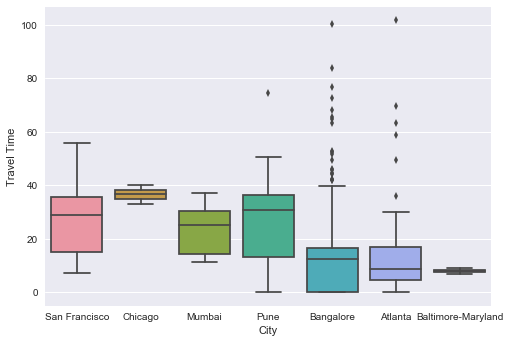

In [410]:
#Visualization to plto certain data trends
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

sns.boxplot(x = rider['City'],y = rider['Travel Time'])
plt.show()

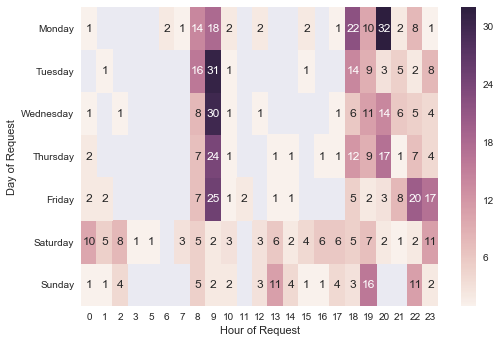

In [411]:
#Usage pattern by hour of day in Bangalore


df_bycat = pd.DataFrame(rider[rider['City']=='Bangalore'].groupby(by = ['Day of Request', 'Hour of Request'], as_index=False)['value'].sum())
result = df_bycat.pivot(index='Day of Request', columns='Hour of Request', values='value')
a1 = sns.heatmap(result, annot= True, yticklabels=[calendar.day_name[x] for x in result.index.unique()])
a1.set(xlabel='Hour of Request', ylabel='Day of Request')
plt.show(a1)

### Random Interesting Insights

#### Time and Money spent on Uber

In [412]:
print('Total days spent travelling is: ',np.sum(rider['Travel Time'])/1440)
print('Total days spent dealing with Uber is: ',np.sum(rider['Total Interaction Time'])/1440)

print('Ride time efficiency: ',np.sum(rider['Travel Time'])/np.sum(rider['Total Interaction Time']) )

Total days spent travelling is:  8.288275462962963
Total days spent dealing with Uber is:  11.571435185185187
Ride time efficiency:  0.7162703096305957


In [413]:
print('Total amount spent (in USD) on Uber is: ',np.sum(rider['Fare USD']))
print('Total amount spent (in INR) on Uber is: ',np.sum(rider['Fare INR']))

Total amount spent (in USD) on Uber is:  2209.1875714285716
Total amount spent (in INR) on Uber is:  154643.13


#### Today euclidean distance travelled using Uber

In [414]:
print('Total euclidean distance travelled on Uber is: ',np.round(np.sum(rider['Euclid']),2), 'miles')

Total euclidean distance travelled on Uber is:  1915.11 miles


#### Cumulative spending on Uber

In [415]:
weekly_rides = rider.groupby(by = 'Request Date', as_index=False)['Fare USD'].sum()
weekly_rides['cumulative'] = np.cumsum(weekly_rides['Fare USD'])
weekly_rides.drop(['Fare USD'], axis=1, inplace=True)
weekly_rides['Request Date'] = weekly_rides['Request Date'].apply(lambda x: matplotlib.dates.date2num(x))

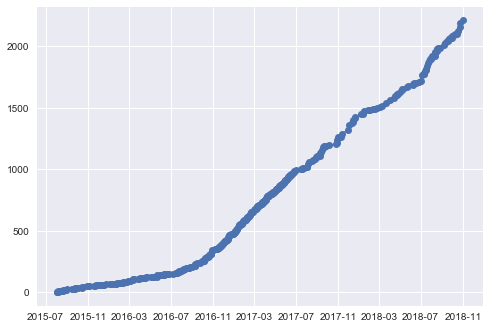

In [416]:
plt.plot_date(weekly_rides['Request Date'], weekly_rides['cumulative'], ls = 'solid')
plt.show()

In [417]:
rider_total = rider.copy()

In [418]:
rider = rider.loc[rider['Trip or Order Status']=='COMPLETED']

,City,Product Type,Trip or Order Status,Request Time,Begin Trip Time,Begin Trip Lat,Begin Trip Lng,Begin Trip Address,Dropoff Time,Dropoff Lat,...,Total Interaction Time,Hour of Request,Month of Request,Day of Request,Week of Request,value,Request Date,Euclid,Product,Country
0,San Francisco,Pool: MATCHED,COMPLETED,2018-11-01 19:49:29+00:00,2018-11-01 19:51:52+00:00,37.615700,-122.386030,"Garage Level 5, Terminal 1, Section B - Pickup...",2018-11-01 20:28:26+00:00,37.795140,...,38.950000,12,11,3,44,1,2018-11-01,12.439201,Shared,USA
1,Chicago,UberX,COMPLETED,2018-10-25 23:46:11+00:00,2018-10-25 23:50:17+00:00,41.891812,-87.628418,"540 N State St, Chicago, IL 60654, US",2018-10-26 00:30:21+00:00,41.979488,...,44.166667,18,10,3,43,1,2018-10-25,15.496702,Normal,USA
2,Chicago,UberX,COMPLETED,2018-10-24 17:19:50+00:00,2018-10-24 17:20:31+00:00,41.976180,-87.903570,"Terminal 3, Upper Level, Left of Door 3A, O'Ha...",2018-10-24 17:53:37+00:00,42.044390,...,33.783333,12,10,2,43,1,2018-10-24,12.314539,Normal,USA
3,San Francisco,UberX,COMPLETED,2018-09-09 23:44:43+00:00,2018-09-09 23:45:40+00:00,37.418560,-121.898040,"298 Great Mall Dr, Milpitas, CA 95035, USA",2018-09-10 00:05:12+00:00,37.397790,...,20.483333,16,9,6,36,1,2018-09-09,3.262854,Normal,USA
4,San Francisco,Express Pool: MATCHED,COMPLETED,2018-09-09 01:28:26+00:00,2018-09-09 01:36:50+00:00,37.395490,-121.947470,"3985 Rivermark Pkwy, Santa Clara, CA 95054, USA",2018-09-09 01:50:17+00:00,37.334650,...,21.850000,18,9,5,36,1,2018-09-08,5.307398,Shared,USA
5,Mumbai,UberGo,COMPLETED,2018-08-20 15:50:56+00:00,2018-08-20 16:16:36+00:00,19.123079,72.895326,"L & T Emerald Isle Rd, New Mhada Colony, Savar...",2018-08-20 16:47:58+00:00,19.174896,...,57.033333,21,8,0,34,1,2018-08-20,4.163813,Normal,India
6,Pune,UberGo,COMPLETED,2018-08-17 08:11:26+00:00,2018-08-17 08:17:25+00:00,18.487084,73.898270,"Parmer Garden, Clover Village, Wanwadi, Pune, ...",2018-08-17 08:52:12+00:00,18.549839,...,40.766667,13,8,4,33,1,2018-08-17,7.041422,Normal,India
7,Pune,Premier,COMPLETED,2018-08-17 06:29:58+00:00,2018-08-17 06:35:14+00:00,18.550049,73.813246,"519, In Land Rd, Ward No. 8, Sadhu Vasvani Nag...",2018-08-17 07:11:23+00:00,18.486553,...,41.416667,11,8,4,33,1,2018-08-17,7.080776,Normal,India
8,Bangalore,UberGo,COMPLETED,2018-08-13 02:22:30+00:00,2018-08-13 02:34:31+00:00,12.992544,77.615111,"1st Cross Rd, Sindhi Colony, Pulikeshi Nagar, ...",2018-08-13 03:18:56+00:00,13.199490,...,56.433333,7,8,0,33,1,2018-08-13,15.594826,Normal,India
9,Bangalore,Premier,COMPLETED,2018-08-12 14:04:40+00:00,2018-08-12 14:10:25+00:00,12.933507,77.621825,"Opus, 1st Cross Rd, Srirampuram, 5th Block, Ko...",2018-08-12 14:41:11+00:00,12.992097,...,36.516667,19,8,6,32,1,2018-08-12,4.071953,Normal,India


Narrowing focus to Atlanta

In [419]:
print('Total number of Uber trips in Atlanta is: ',np.sum(rider.loc[rider['City']=='Atlanta']['value']))
print('Total amount spent (in USD) on Uber in Atlanta is: ',np.sum(rider.loc[rider['City']=='Atlanta']['Fare USD']))

Total number of Uber trips in Atlanta is:  199
Total amount spent (in USD) on Uber in Atlanta is:  1259.12


In [420]:
#Trips where the ride time is less than 15 mins
print('Total number of Uber trips in Atlanta is where euclidean distance < 2.5 miles: ',np.sum(rider.loc[(rider['City']=='Atlanta') & (rider['Euclid']<2)]['value']))
print('Amount spent on Uber trips in Atlanta is where travel time < 2.5 miles: ',np.sum(rider.loc[(rider['City']=='Atlanta') & (rider['Euclid']<2)]['Fare USD']))

Total number of Uber trips in Atlanta is where euclidean distance < 2.5 miles:  127
Amount spent on Uber trips in Atlanta is where travel time < 2.5 miles:  525.1500000000001


In [617]:
#Equivaluent cost of taking a lime

def lime_cost(distance):
    time = distance*(1.5/7.5)*60
    if time<=1:
        return 1
    else:
        return 1 + (time)*0.15
    
def lime_time(distance):
    time = distance*(1.5/7.5)*60
    return time

In [618]:
short_rides = rider.loc[(rider['City']=='Atlanta')&(rider['Euclid']<2)]
short_rides['Lime_cost'] = short_rides.apply(lambda x: lime_cost(x['Euclid']), axis = 1)
short_rides['Lime_time'] = short_rides.apply(lambda x: lime_time(x['Euclid']), axis = 1)

C:\Users\Jeh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\Jeh\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [619]:
short_rides

,City,Product Type,Trip or Order Status,Request Time,Begin Trip Time,Begin Trip Lat,Begin Trip Lng,Begin Trip Address,Dropoff Time,Dropoff Lat,...,Month of Request,Day of Request,Week of Request,value,Request Date,Euclid,Product,Country,Lime_cost,Lime_time
15,Atlanta,UberX,COMPLETED,2018-07-26 02:07:57+00:00,2018-07-26 02:11:56+00:00,33.795789,-84.369150,"1536 Monroe Dr NE, Atlanta, GA 30324, US",2018-07-26 02:28:59+00:00,33.787809,...,7,2,30,1,2018-07-25,1.844306,Normal,USA,4.319751,22.131670
21,Atlanta,UberX,COMPLETED,2018-06-10 05:40:54+00:00,2018-06-10 05:44:44+00:00,33.773428,-84.399113,"355 Ferst Dr NW, Atlanta, GA 30313, USA",2018-06-10 05:52:29+00:00,33.788685,...,6,6,23,1,2018-06-10,1.060394,Normal,USA,2.908710,12.724732
23,Atlanta,POOL,COMPLETED,2018-04-22 14:05:11+00:00,2018-04-22 14:08:24+00:00,33.788079,-84.399775,"1200-1214 Mecaslin St NW, Atlanta, GA 30318, USA",2018-04-22 14:12:12+00:00,33.775570,...,4,6,16,1,2018-04-22,0.878740,Shared,USA,2.581731,10.544877
30,Atlanta,Pool: MATCHED,COMPLETED,2018-01-28 15:46:00+00:00,2018-01-28 15:53:40+00:00,33.788595,-84.399769,"1220 Mecaslin St NW, Atlanta, GA 30318, USA",2018-01-28 15:57:25+00:00,33.775576,...,1,6,4,1,2018-01-28,0.913455,Shared,USA,2.644220,10.961465
38,Atlanta,uberX,COMPLETED,2017-09-10 06:56:40+00:00,2017-09-10 06:59:40+00:00,33.788248,-84.399839,"1200-1214 Mecaslin St NW, Atlanta, GA 30318, USA",2017-09-10 07:02:32+00:00,33.782426,...,9,6,36,1,2017-09-10,0.612313,Normal,USA,2.102163,7.347752
39,Atlanta,uberX,COMPLETED,2017-09-10 06:46:32+00:00,2017-09-10 06:47:27+00:00,33.777000,-84.382856,"129 6th St NE, Atlanta, GA 30308, USA",2017-09-10 06:55:31+00:00,33.787918,...,9,6,36,1,2017-09-10,1.230514,Normal,USA,3.214925,14.766168
40,Atlanta,uberX,COMPLETED,2017-09-02 04:36:44+00:00,2017-09-02 04:41:55+00:00,33.785900,-84.411281,"785 14th St NW, Atlanta, GA 30318, USA",2017-09-02 04:48:24+00:00,33.787768,...,9,5,35,1,2017-09-02,0.674370,Normal,USA,2.213867,8.092445
41,Atlanta,uberX,COMPLETED,2017-08-26 03:33:44+00:00,2017-08-26 03:35:47+00:00,33.777288,-84.382702,"811 Juniper St NE, Atlanta, GA 30308, USA",2017-08-26 03:50:48+00:00,33.782634,...,8,4,34,1,2017-08-25,1.476680,Normal,USA,3.658025,17.720164
42,Atlanta,uberX,COMPLETED,2017-08-19 06:01:03+00:00,2017-08-19 06:04:38+00:00,33.784784,-84.384383,"1100-1104 Crescent Ave NE, Atlanta, GA 30309, USA",2017-08-19 06:16:25+00:00,33.785152,...,8,5,33,1,2017-08-19,1.140199,Normal,USA,3.052358,13.682389
43,Atlanta,uberX,COMPLETED,2017-08-19 01:05:18+00:00,2017-08-19 01:09:15+00:00,33.788687,-84.401597,"362 16th St NW, Atlanta, GA 30318, USA",2017-08-19 01:14:40+00:00,33.784289,...,8,4,33,1,2017-08-18,1.036980,Normal,USA,2.866563,12.443755


In [616]:
print('Total cost of taking a rideshare for short distances: ',np.sum(short_rides['Fare USD']))
print('Equivalent cost of renting a lime scooter: ',np.sum(short_rides['Lime_cost']))

print('Reduction in cost:',np.round((np.sum(short_rides['Fare USD'])- np.sum(short_rides['Lime_cost']))*100/np.sum(short_rides['Fare USD']),2), '% percent' )

Total cost of taking a rideshare for short distances:  525.1500000000001
Equivalent cost of renting a lime scooter:  363.45018166393135
Reduction in cost: 30.79 % percent


In [621]:
print('Average interaction of taking a rideshare for short distances: ',np.mean(short_rides['Total Interaction Time']))
print('Average interaction of taking a lime scooter for short distances: ',np.mean(short_rides['Lime_time']))

Average interaction of taking a rideshare for short distances:  13.554461942257216
Average interaction of taking a lime scooter for short distances:  12.412083026978022


In [424]:
rider.to_csv('Modified_trips_data.csv')

### Statistical tests to determing the difference in wait times/ travel times between shared and normal rides

I cannot use a t-test since the distribution of times is not normal. Furthermore sample size is low to convert it to a normal distribution. Owing to this, I am using the Mann Whitney U Test.

In [425]:
rider['Product'] = rider.apply(lambda x: 'Normal' if str(x['Product Type']).lower() in ['uberx', 'ubergo', 'premier', 'uberxl'] else 'Shared', axis =1)
rider['Country'] = rider.apply(lambda x: 'USA' if x['City'] not in ['Mumbai', 'Pune', 'Bangalore'] else 'India', axis =1)

C:\Users\Jeh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\Jeh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [426]:
shared_wait_time = rider.loc[(rider['Country']=='USA') & (rider['Product']=='Shared')]['Wait Time']
normal_wait_time = rider.loc[(rider['Country']=='USA') & (rider['Product']=='Normal')]['Wait Time']
scipy.stats.mannwhitneyu(shared_wait_time, normal_wait_time)

MannwhitneyuResult(statistic=3719.5, pvalue=0.026459434978122972)

The p-value is 0.06 implying that there is a significant difference (with > 90% confidence) in wait times for a shared ride vs a normal ride.

However since the number of samples are low, further analysis on subsets of data does not give us meaningful results. I cannot with confidence say that shared rides have a higher wait time for shorter rides than longer rides.

#### Split based on ride distance - short vs long rides

In [490]:
short_shared_wait_time = rider.loc[(rider['Country']=='USA') & (rider['Product']=='Shared') & (rider['Euclid']<=2.5)]['Wait Time']
short_normal_wait_time = rider.loc[(rider['Country']=='USA') & (rider['Product']=='Normal') & (rider['Euclid']<=2.5)]['Wait Time']

In [491]:
len(long_shared_wait_time)

33

In [429]:
import scipy

In [492]:
scipy.stats.mannwhitneyu(short_shared_wait_time, short_normal_wait_time)

MannwhitneyuResult(statistic=1355.5, pvalue=0.037438283928815125)

In [493]:
scipy.stats.ttest_ind(short_shared_wait_time, short_normal_wait_time)

Ttest_indResult(statistic=2.108318508725189, pvalue=0.03682414230811434)

In [494]:
long_shared_wait_time = rider.loc[(rider['Country']=='USA') & (rider['Product']=='Shared') & (rider['Euclid']>2.5)& (rider['Euclid']<7.5)]['Wait Time']
long_normal_wait_time = rider.loc[(rider['Country']=='USA') & (rider['Product']=='Normal') & (rider['Euclid']>2.5)& (rider['Euclid']<7.5)]['Wait Time']
scipy.stats.mannwhitneyu(long_shared_wait_time, long_normal_wait_time)

MannwhitneyuResult(statistic=43.0, pvalue=0.007187735305556769)

In [495]:
scipy.stats.ttest_ind(long_shared_wait_time, long_normal_wait_time)

Ttest_indResult(statistic=2.3015282880111054, pvalue=0.027257706008358557)

#### Split based on time of day (9-7,7-9)

In [592]:
day_shared_wait_time = rider.loc[(rider['City']=='Atlanta') & (rider['Product']=='Shared') & (rider['Hour of Request']>=7) & (rider['Hour of Request']<=22)& (rider['Euclid']<5)]['Wait Time']
day_normal_wait_time = rider.loc[(rider['City']=='Atlanta') & (rider['Product']=='Normal') & (rider['Hour of Request']>=7) & (rider['Hour of Request']<=22)& (rider['Euclid']<5)]['Wait Time']

In [593]:
#scipy.stats.mannwhitneyu(day_shared_wait_time, day_normal_wait_time)
len(day_normal_wait_time)

25

In [594]:
scipy.stats.ttest_ind(day_shared_wait_time, day_normal_wait_time)

Ttest_indResult(statistic=1.730318590959134, pvalue=0.08621007751300877)

In [595]:
night_shared_wait_time = rider.loc[(rider['City']=='Atlanta') & (rider['Product']=='Shared') & (rider['Hour of Request']<7) | (rider['Hour of Request']>22) & (rider['Euclid']<5)]['Wait Time']
night_normal_wait_time = rider.loc[(rider['City']=='Atlanta') & (rider['Product']=='Normal') & (rider['Hour of Request']<7) | (rider['Hour of Request']>22) & (rider['Euclid']<5)]['Wait Time']
scipy.stats.mannwhitneyu(night_shared_wait_time, night_normal_wait_time)

MannwhitneyuResult(statistic=1257.5, pvalue=0.23198882559026307)

In [596]:
scipy.stats.ttest_ind(night_shared_wait_time, night_normal_wait_time)

Ttest_indResult(statistic=0.6826462443225073, pvalue=0.4963628787607317)

#### Significance tests based on total interaction times

In [466]:
shared_travel_time = rider.loc[(rider['Country']=='USA') & (rider['Product']=='Shared')]['Total Interaction Time']
normal_travel_time = rider.loc[(rider['Country']=='USA') & (rider['Product']=='Normal')]['Total Interaction Time']
scipy.stats.mannwhitneyu(shared_travel_time, normal_travel_time)

MannwhitneyuResult(statistic=4438.0, pvalue=0.4438919103605856)

In [481]:
scipy.stats.ttest_ind(shared_travel_time, normal_travel_time)

Ttest_indResult(statistic=0.47198057672763677, pvalue=0.6374283832433176)

A low p value implies that the total interaction time between shared and normal rides is significantly different with 90% confidence. Now lets delve deeper into subsets of this data.

Long Rides

In [487]:
long_shared_travel_time = rider.loc[(rider['Country']=='USA') & (rider['Product']=='Shared') & (rider['Euclid']>2.5)& (rider['Euclid']<7.5)]['Total Interaction Time']
long_normal_travel_time = rider.loc[(rider['Country']=='USA') & (rider['Product']=='Normal') & (rider['Euclid']>2.5)& (rider['Euclid']<7.5)]['Total Interaction Time']
scipy.stats.mannwhitneyu(long_shared_travel_time, long_normal_travel_time)

MannwhitneyuResult(statistic=32.0, pvalue=0.0021060920648896726)

In [488]:
scipy.stats.ttest_ind(long_shared_travel_time, long_normal_travel_time)

Ttest_indResult(statistic=1.9474874223695127, pvalue=0.059308461473782347)

Short Rides

In [472]:
short_shared_travel_time = rider.loc[(rider['Country']=='USA') & (rider['Product']=='Shared') & (rider['Euclid']<2.5)]['Total Interaction Time']
short_normal_travel_time = rider.loc[(rider['Country']=='USA') & (rider['Product']=='Normal') & (rider['Euclid']<2.5)]['Total Interaction Time']
scipy.stats.mannwhitneyu(short_shared_travel_time, short_normal_travel_time)

MannwhitneyuResult(statistic=1517.0, pvalue=0.16523638985558847)

In [483]:
scipy.stats.ttest_ind(short_shared_travel_time, short_normal_travel_time)

Ttest_indResult(statistic=1.2609015933790986, pvalue=0.20948736775298987)

A high p value implies that the total interaction time between shared and normal rides for short distances is <b>not</b> significantly different. Hence Share a cab when possible!

In [503]:
long_shared_fare = rider.loc[(rider['City']=='Atlanta') & (rider['Product']=='Shared') & (rider['Euclid']>2.5)& (rider['Euclid']<7.5)]['Fare USD']
long_normal_fare = rider.loc[(rider['City']=='Atlanta') & (rider['Product']=='Normal') & (rider['Euclid']>2.5)& (rider['Euclid']<7.5)]['Fare USD']
scipy.stats.ttest_ind(long_shared_fare, long_normal_fare)

Ttest_indResult(statistic=-4.80926260764009, pvalue=3.9903396773761715e-05)

In [504]:
short_shared_fare = rider.loc[(rider['City']=='Atlanta') & (rider['Product']=='Shared') & (rider['Euclid']<2.5)]['Fare USD']
short_normal_fare = rider.loc[(rider['City']=='Atlanta') & (rider['Product']=='Normal') & (rider['Euclid']<2.5)]['Fare USD']
scipy.stats.ttest_ind(short_shared_fare, short_normal_fare)

Ttest_indResult(statistic=-14.6390168327442, pvalue=1.4000346216822817e-29)

In [505]:
np.mean(long_normal_fare) - np.mean(long_shared_fare)

7.161071428571429

Spider Chart

In [438]:
spider_data = pd.DataFrame(np.zeros((20,6)))

In [439]:
for dist in range(10):
    m5_rides_shared = rider.loc[(rider['Euclid']<dist+1) & (rider['Country']=='USA') & (rider['Product']=='Shared')]
    m5_rides_normal = rider.loc[(rider['Euclid']<dist+1) & (rider['Country']=='USA') & (rider['Product']=='Normal')]

    spider_data.iloc[dist,0] = 'Shared'
    spider_data.iloc[dist,1] = np.mean(m5_rides_shared['Wait Time'])
    spider_data.iloc[dist,2] = np.mean(m5_rides_shared['Travel Time'])
    spider_data.iloc[dist,3] = np.mean(m5_rides_shared['Fare USD'])
    spider_data.iloc[dist,4] = np.mean(m5_rides_shared['Total Interaction Time'])
    spider_data.iloc[dist,5] = np.mean(m5_rides_shared['Wait Time'])
    

    spider_data.iloc[dist+10,0] = 'Normal'
    spider_data.iloc[dist+10,1] = np.mean(m5_rides_normal['Wait Time'])
    spider_data.iloc[dist+10,2] = np.mean(m5_rides_normal['Travel Time'])
    spider_data.iloc[dist+10,3] = np.mean(m5_rides_normal['Fare USD'])
    spider_data.iloc[dist+10,4] = np.mean(m5_rides_normal['Total Interaction Time'])
    spider_data.iloc[dist+10,5] = np.mean(m5_rides_normal['Wait Time'])

In [440]:
spider_data.columns = ['Product', 'Wait Time', 'Travel Time', 'Fare', 'Total Interaction Time' ,'Wait Time Loop']
spider_data

,Product,Wait Time,Travel Time,Fare,Total Interaction Time,Wait Time Loop
0,Shared,6.075000,6.404885,3.228793,12.479885,6.075000
1,Shared,5.776000,8.073000,3.258000,13.849000,5.776000
2,Shared,5.829613,9.589137,3.287143,15.418750,5.829613
3,Shared,5.869943,10.616524,3.334872,16.486467,5.869943
4,Shared,5.905738,11.541940,3.395574,17.447678,5.905738
5,Shared,6.050877,12.180201,3.761955,18.231078,6.050877
6,Shared,6.175304,12.695620,3.815839,18.870925,6.175304
7,Shared,6.151199,12.858633,3.863453,19.009832,6.151199
8,Shared,6.189524,12.967262,3.895071,19.156786,6.189524
9,Shared,6.156944,13.629514,4.118681,19.786458,6.156944


In [441]:
angles=np.linspace(0, 2*np.pi, 4, endpoint=False)
# close the plot
shared_spider_data = np.array(spider_data.iloc[0:10,1:])
stats_shared=np.array(shared_spider_data)

normal_spider_data = np.array(spider_data.iloc[10:,1:])
stats_normal=np.array(normal_spider_data)

angles=np.concatenate((angles,[angles[0]]))

In [442]:
len(shared_spider_data)

10

In [443]:

import plotly.plotly as py
import plotly.graph_objs as go
import plotly

plotly.tools.set_credentials_file(username='jehlokhande93', api_key='5w9l1gR8NzevxlrbaAly')

data = [dict(
    go.Scatterpolar(
      r = shared_spider_data[i],
      theta = ['Wait Time', 'Travel Time', 'Fare', 'Total Interaction Time'],
      fill = 'toself',
      name = 'Shared'),
    visible = False) for i in range(10)]

data2 = [dict(
    go.Scatterpolar(
      r = normal_spider_data[i],
      theta = ['Wait Time', 'Travel Time', 'Fare', 'Total Interaction Time'],
      fill = 'toself',
      name = 'Normal'),
    visible = False) for i in range(10)]
#     ,
#     go.Scatterpolar(
#       r = normal_spider_data,
#       theta = ['Wait Time', 'Travel Time', 'Fare'],
#       fill = 'toself',
#       name = 'Normal'
#     )

data = data+data2
data[0]['visible'] = True
data[10]['visible'] = True

#print(data)

steps = []
for i in range(10):
    step = dict(
        method = 'restyle',  
        label = str(i+1)+' miles',
        args = ['visible', [False] * 20],
    )
    step['args'][1][i] = True # Toggle i'th trace to "visible"
    step['args'][1][i+10] = True
    steps.append(step)

#print(steps)

sliders = [dict(
    active = 10,
    currentvalue = {"prefix": "Distance: "},
    pad = {"t": 10},
    steps = steps
)]

layout = go.Layout(
  polar = dict(
    bgcolor = "light gray",
      angularaxis = dict(
        tickwidth = 2,
        linewidth = 3,
        layer = "below traces"),
    radialaxis = dict(
      visible = True,
        showline = True,
        linewidth = 2,
        tickwidth = 2,
        gridcolor = " lightgray",
        gridwidth = 2,
      range = [0, 25]
    )
  ),
    sliders = sliders,
  showlegend = True
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename = "radar.html")

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~jehlokhande93/0 or inside your plot.ly account where it is named 'radar.html'
